# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
df = athletes
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


#### Avaliando a altura dos atletas

In [6]:
height_sample = get_sample(df, col_name='height', n=3000)
height_sample.head()

1811     1.79
7962     1.81
10280    1.83
317      1.68
6989     2.01
Name: height, dtype: float64

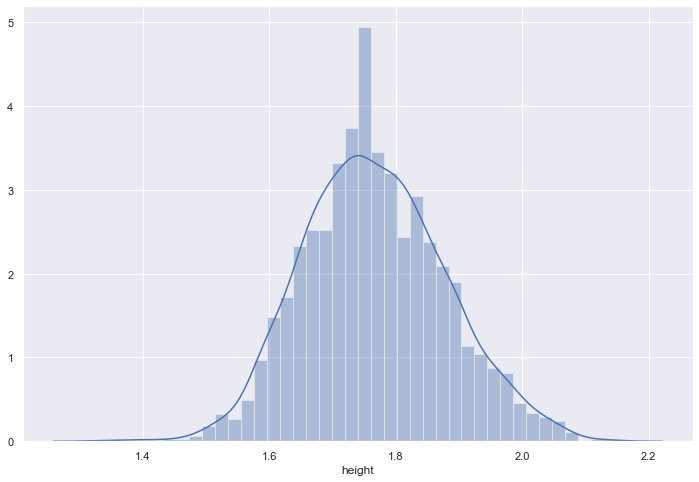

In [7]:
sns.distplot(height_sample)

O teste de Shapiro vai verificar dois valores: A comparação estatística com valores críticos* e o p-valor.
Na Questão 1, é definido que o nível de significância (alpha) será de 5% ou 0.05.
Assumir que a distribuição é Gaussiana, implica que nossa hipótese zero, H0, é Verdadeira.

De acordo com a documentação do SciPy, se `p <= alpha`, a distribuição não é normal e rejeita-se a H0. Se `p > alpha` **não** rejeita-se H0 e a distribuição é normal.

In [8]:
print(sct.shapiro(height_sample))

sct.shapiro(height_sample)[1] <= 0.05

(0.9961519837379456, 5.681722541339695e-07)


True

Para Jarque-Bera, aplica-se o mesmo critério de avaliação de p-valor.

In [9]:
print(sct.jarque_bera(height_sample))
sct.jarque_bera(height_sample)[1] <= 0.5

(13.03363513594265, 0.001478366424594868)


True

Ambos os resultados de p-valor indicam uma amostra não-normal.

#### Avaliando o peso dos atletas

In [10]:
weight_sample = get_sample(df, col_name='weight', n=3000)
weight_sample.head()

2162    80.0
3450    70.0
6886    69.0
3871    66.0
6383    82.0
Name: weight, dtype: float64

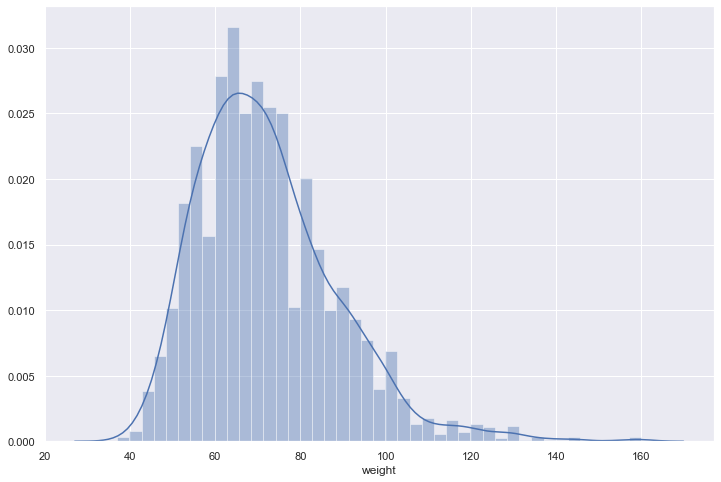

In [11]:
sns.distplot(weight_sample)

In [12]:
sct.normaltest(weight_sample).pvalue > 0.05

False

In [13]:
ws_log = np.log(weight_sample)
ws_log.describe()

count    3000.000000
mean        4.254357
std         0.216761
min         3.610918
25%         4.094345
50%         4.248495
75%         4.394449
max         5.075174
Name: weight, dtype: float64

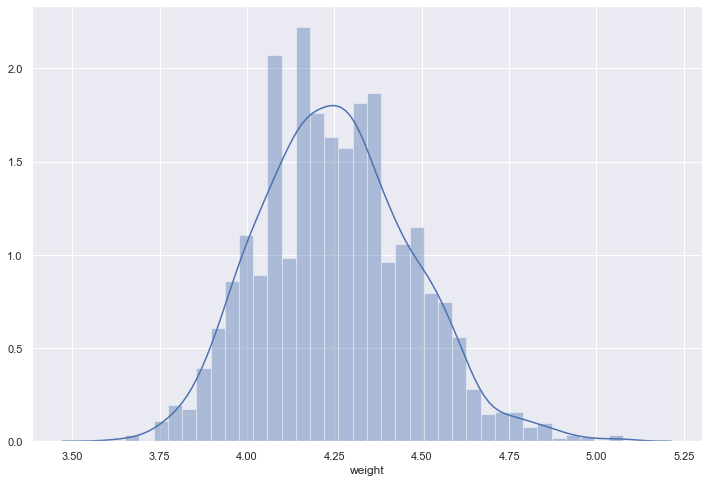

In [14]:
sns.distplot(ws_log)

In [15]:
sct.normaltest(ws_log).pvalue > 0.05

False

Mesmo após a transformação logarítimica, apesar de o formato da distribuição sugerir, a amostra de pesos continua não-normal.

#### Atletas por país: BRA, USA, CAN

Comparação de alturas dos atletas dos três países.

In [16]:
bra = df.query('nationality == "BRA"')['height'].dropna()
usa = df.query('nationality == "USA"')['height'].dropna()
can = df.query('nationality == "CAN"')['height'].dropna()

print(f"BRA: {len(bra)} | USA: {len(usa)} | CAN: {len(can)}")

sct.ttest_ind(bra, usa)

BRA: 476 | USA: 560 | CAN: 320


Ttest_indResult(statistic=-3.2197616412697903, pvalue=0.001322927779592141)

In [17]:
sct.ttest_ind(bra, usa)

Ttest_indResult(statistic=-3.2197616412697903, pvalue=0.001322927779592141)

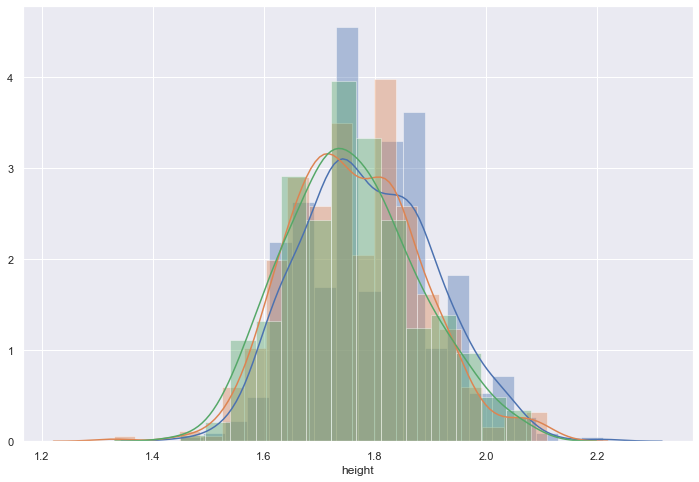

In [18]:
sns.distplot(usa)
sns.distplot(bra)
sns.distplot(can)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [19]:
def q1():
    return (sct.shapiro(height_sample)[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [20]:
def q2():
    return (sct.jarque_bera(height_sample)[1] > 0.5)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [21]:
def q3():
    return (sct.normaltest(weight_sample).pvalue > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [22]:
def q4():
    ws_log = np.log(weight_sample)
    return (sct.normaltest(ws_log).pvalue > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [23]:
def q5():
    bra = df.query('nationality == "BRA"')['height'].dropna()
    usa = df.query('nationality == "USA"')['height'].dropna()

    return sct.ttest_ind(bra, usa, equal_var=False).pvalue > 0.05

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [24]:
def q6():
    bra = df.query('nationality == "BRA"')['height'].dropna()
    can = df.query('nationality == "CAN"')['height'].dropna()

    return sct.ttest_ind(bra, can, equal_var=False).pvalue > 0.05

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [25]:
def q7():
    usa = df.query('nationality == "USA"')['height'].dropna()
    can = df.query('nationality == "CAN"')['height'].dropna()

    return round(sct.ttest_ind(usa, can, equal_var=False).pvalue, 8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [26]:
print(q1(), q2(), q3(), q4(), q5(), q6(), q7())

False False False False False True 0.00046601
